# Введение в обучение без учителя. Базовая кластеризация

Представьте, что вы работаете дата-сайентистом и получаете задачу по маркетинговому исследованию клиентов. Вам необходимо выделить группы покупателей по степени интереса к продукту и по сумме, которую они тратят.

**Как решить данную задачу?**

Обучение с учителем здесь не подходит, так как у нас нет правильных ответов о степени заинтересованности покупателей в продукте.

Однако не спешите расстраиваться — на помощь придёт обучение без учителя, а именно **кластеризация.**

Мы уже рассматривали суть кластеризации в модуле ML-1.

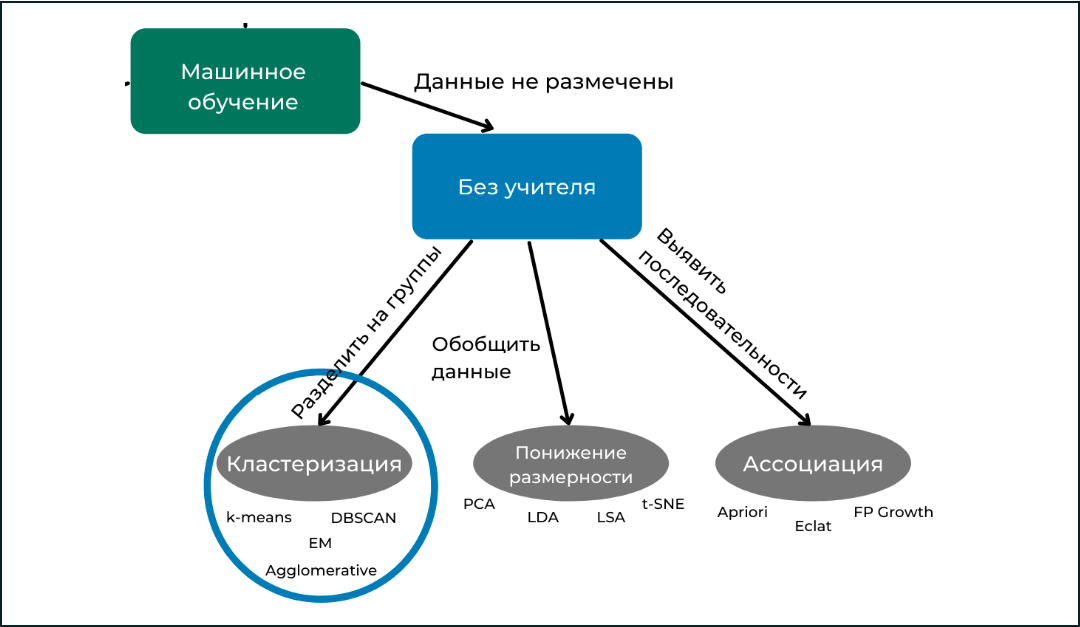

> Кластеризация позволяет разбить объекты на группы, которые называются **кластерами.**

Например, на картинке ниже изображены разные кластеры еды и напитков:

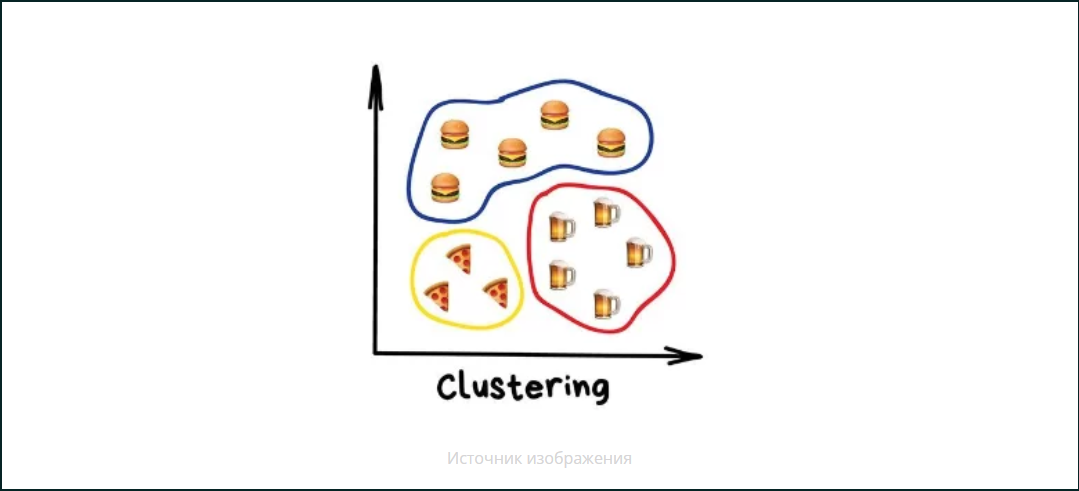

*→ Похожие объекты оказываются внутри одного кластера. Если же объекты разные, то они должны оказаться в разных кластерах.*

Также у каждого кластера есть центроид.

**Центроид** — это центр масс кластера, или среднее значение координат объектов кластера.

На рисунке ниже изображено три кластера, крестик в каждом из них — это центроид:

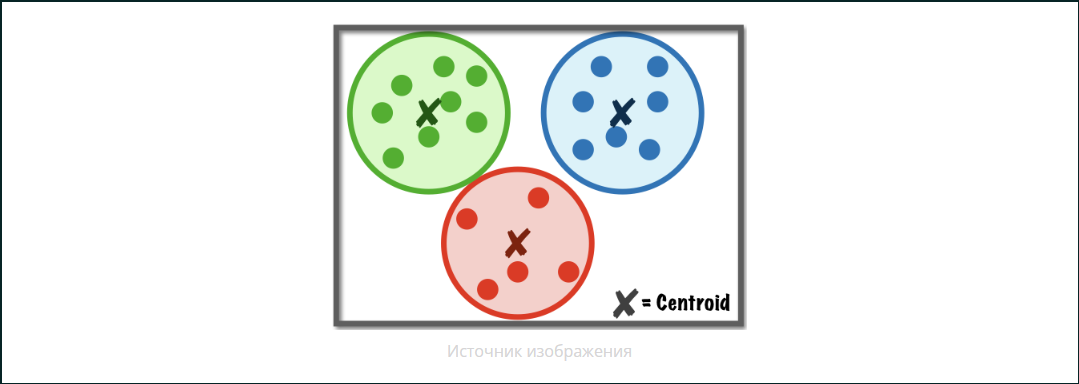

**Как найти этот центроид?**

Допустим, у нас есть маленький кластер, состоящий из четырёх точек. Каждая точка описывается только одним свойством — , рост человека:

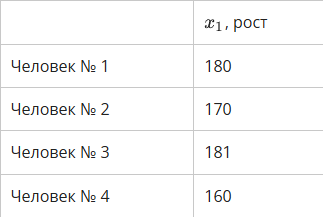

Тогда для нахождения центроида мы берём все значения по оси x и считаем среднее:



Что делать, если данные описываются двумя свойствами, например, рост (***x1***) и вес (***x2***)?

Тогда у этих точек есть ***x1***- и ***x2***-координаты:

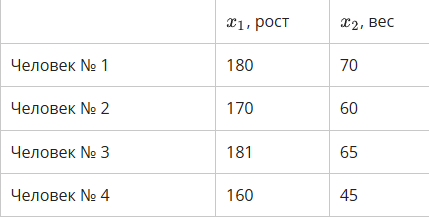

Для нахождения координат центроида мы последовательно находим:

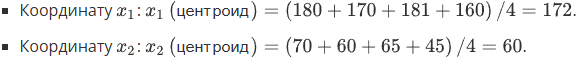

Таким образом, координаты центроида — (172, 60).

Если объект описывается бόльшим количеством признаков (например, рост (***x1***), вес (***x2***), объём талии (***x***) и т. д.), то для нахождения координат центроида мы последовательно, по каждому признаку (координате), ищем среднее значение.

## Алгоритм k-means

Рассмотрим один из наиболее популярных методов кластеризации — k-means.

Данный алгоритм был разработан ещё в 1950-х, но благодаря скорости своей работы он до сих пор остаётся востребованным.

**Идея алгоритма** состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Математически это выглядит следующим образом: 

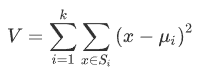

Мы итерируемся по каждому кластеру и для всех векторов ***x*** внутри кластера ***Si*** подсчитываем центроиды (***μi***). Далее рассчитываем разницу между каждым вектором ***x*** кластера ***Si*** и центроидом кластера ***Si***. Необходимо, чтобы это значение, возведённое в квадрат (***V***), было минимальным для каждого кластера.

А сейчас переведём сложные математические термины на человеческий язык.

Рассмотрим работу данного алгоритма на примере. Допустим, у нас есть данные с разными значениями свойства ***x1***. Эти данные необходимо разделить на кластеры. Нанесём значения свойства ***x1*** на ось **X**:

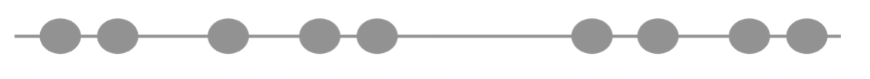

Для этих данных нам нужно провести анализ и выделить три кластера. Вы с большой вероятностью скажете, что данные можно разделить на кластеры (жёлтый, розовый и зелёный) следующим образом:

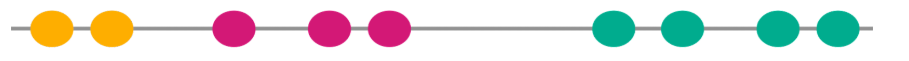

Но как реализовать это в алгоритме? Алгоритм k-means состоит из **девяти шагов.** Давайте подробно рассмотрим каждый из них:

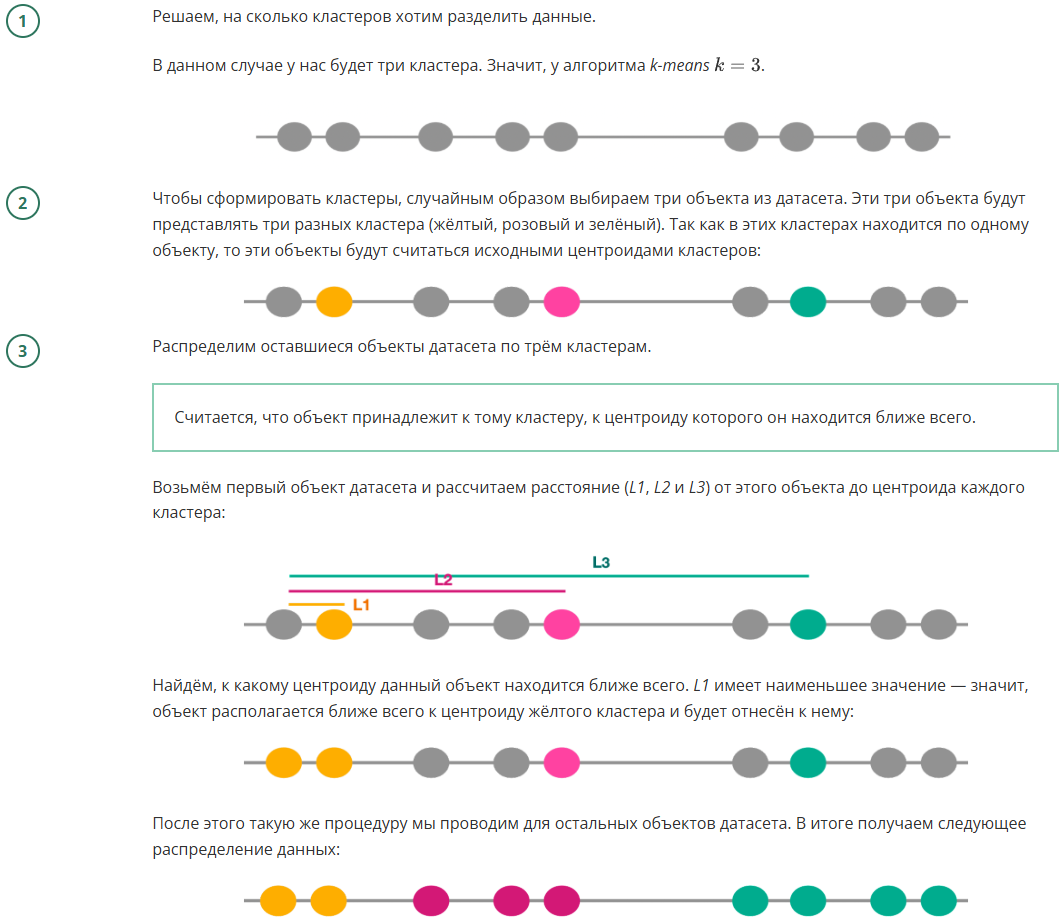
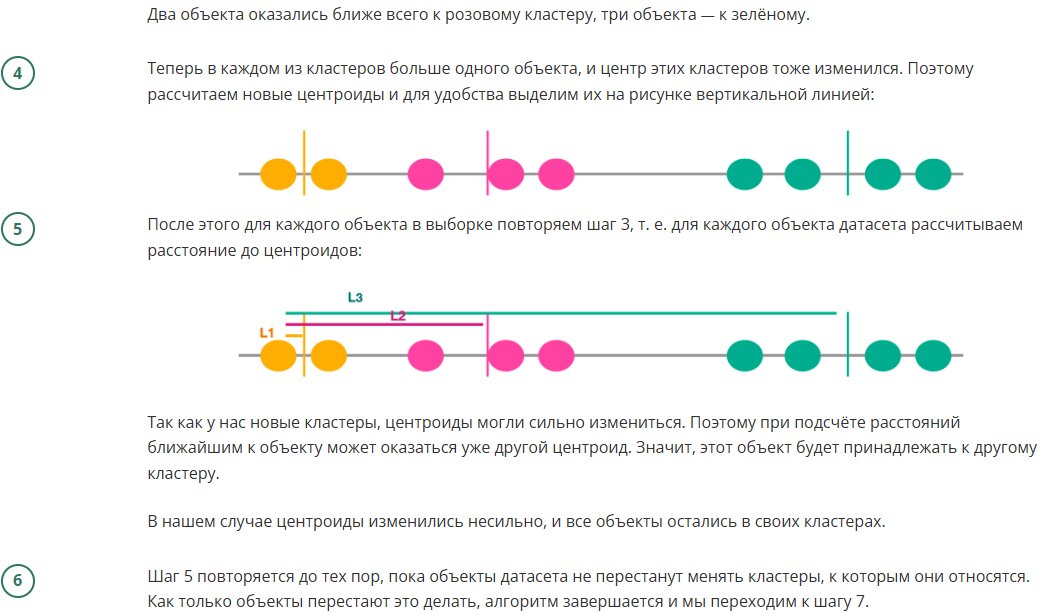
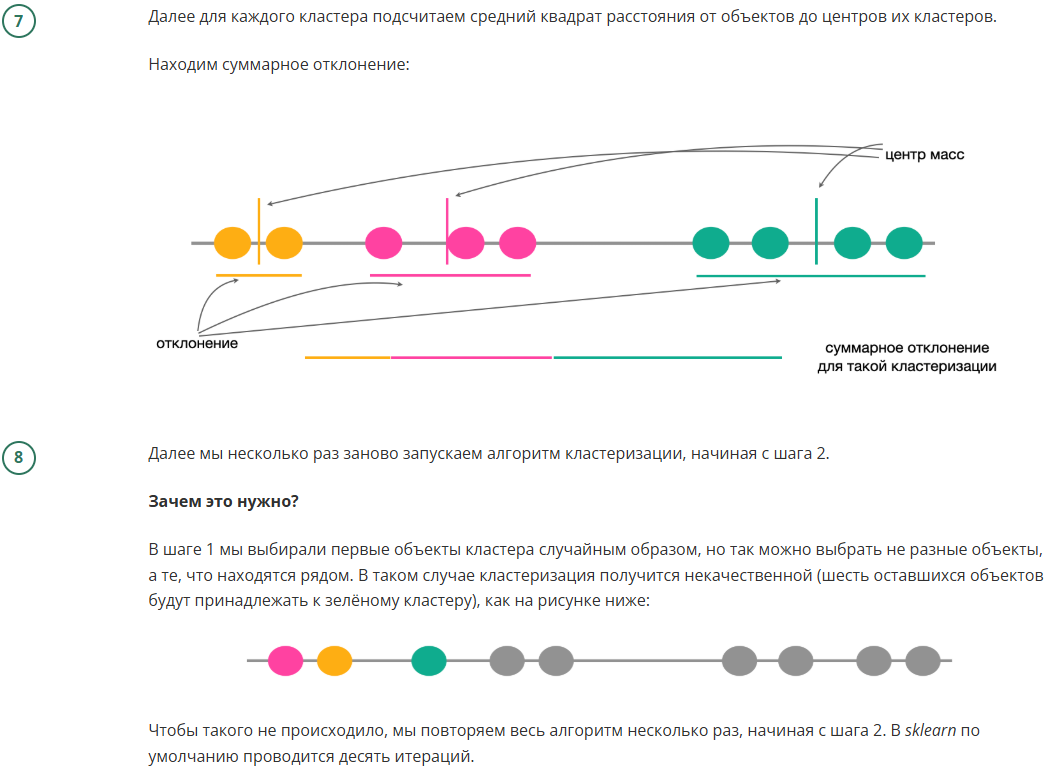
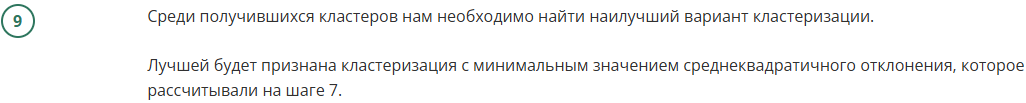

Очевидно, что если все объекты будут в одном кластере, это будет худший сценарий с максимальным среднеквадратичным отклонением:

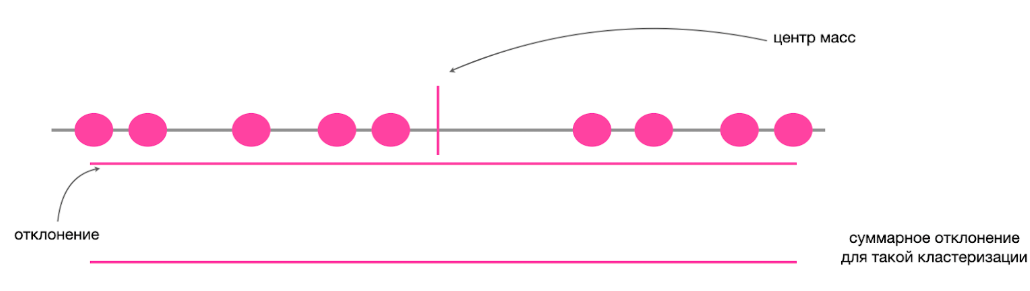

Если каждый объект будет принадлежать собственному кластеру, отклонение будет нулевым, так как один объект будет являться и объектом кластера, и его центром масс, а значит расстояние между объектом кластера и центроидом кластера равно нулю. Такое разбиение будет считаться переобучением, так как мы слишком подстраиваемся под данные:

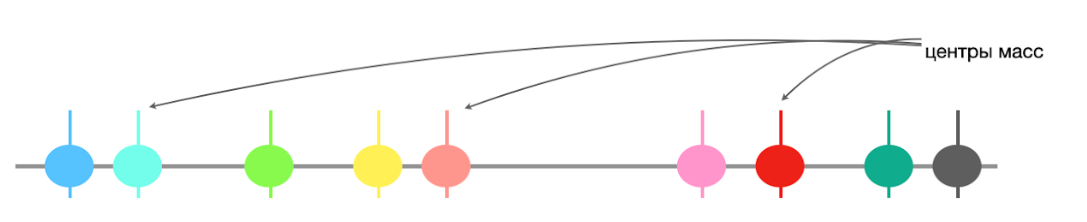

> Только что мы рассмотрели, как работает алгоритм для одномерного случая (если есть только один признак, описывающий объект). Ниже вы можете увидеть, как работает алгоритм для двухмерного случая (когда объект описывается двумя признаками).

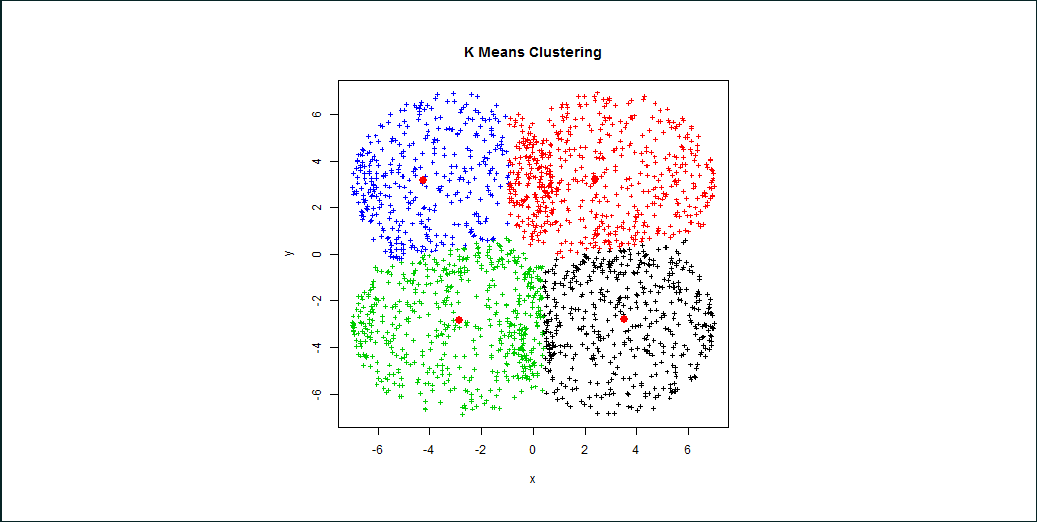

> Если объект описывается тремя и более признаками, поиск кластеров идёт в -мерном пространстве признаков. Однако такую работу алгоритма довольно сложно визуализировать.

Рассмотренный нами алгоритм был основан на центроидах: мы находили центры кластеров и присваивали объекты к ближайшему центроиду кластера.

На самом деле центры кластера инициализируют разными способами. В зависимости от этого выделяется **несколько вариаций алгоритма k-means:**

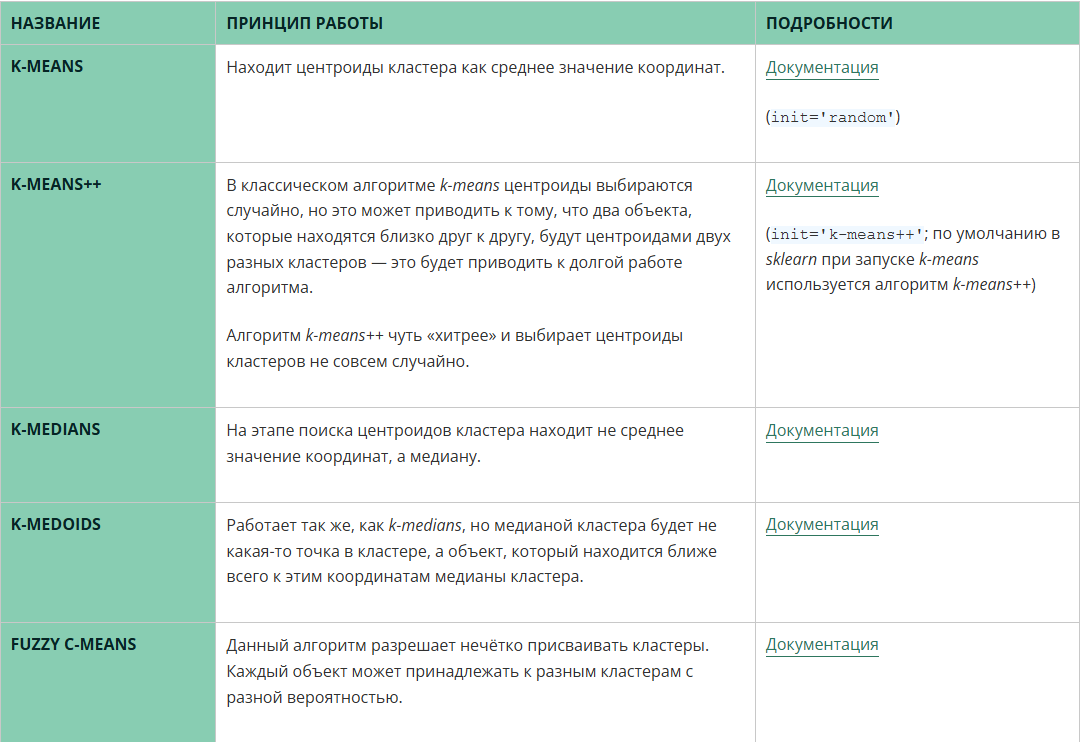

Теперь мы знаем, как работает алгоритм k-means, но не хотелось бы реализовывать его с нуля. Для того чтобы запустить алгоритм кластеризации *k-means*, нам нужна библиотека *sklearn* и модуль *KMeans.*

**Что необходимо для запуска?**

- Обязательно задать количество кластеров, на которые необходимо разделить данные.

- Данные, т. е. параметры объектов (), которые мы будем передавать в виде матрицы наблюдений X.

После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот объект относится:

In [5]:
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans
import pandas as pd

df = pd.DataFrame({
    'x1': [75,399,1124,77654,43209],
    'x2': [111,4324,10443,446,100000],
    'x3': [111666,43243,1,55,77753230]
})

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_
labels

array([2, 0, 0, 0, 1], dtype=int32)

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict:

In [6]:
df2 = pd.DataFrame({
    'x1': [45,458,33333,10005,89414],
    'x2': [111222,4,1,0,666584],
    'x3': [721,554,9999,99942,1000000]
})

In [7]:
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

array([0, 0, 0, 2, 2], dtype=int32)

Чтобы запустить алгоритм, необходимо задать **параметры кластеризации:**

- **n_clusters** — количество кластеров. По умолчанию — 8.
- **init** — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется k-means++.
- **n_init** — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию n_init = 10.
- **max_iter** — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.
- **random_state** — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

Теперь попробуем применить полученные знания на практике.

У нас есть данные по покемонам. Для каждого покемона известны его сила атаки, уровень защиты, скорость бега и ещё пара параметров. Попробуем найти кластеры покемонов, основываясь на силе атаки и уровне защиты.

### Недостатки алгоритма k-means

> - Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть k, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

> - Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо.

> - Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

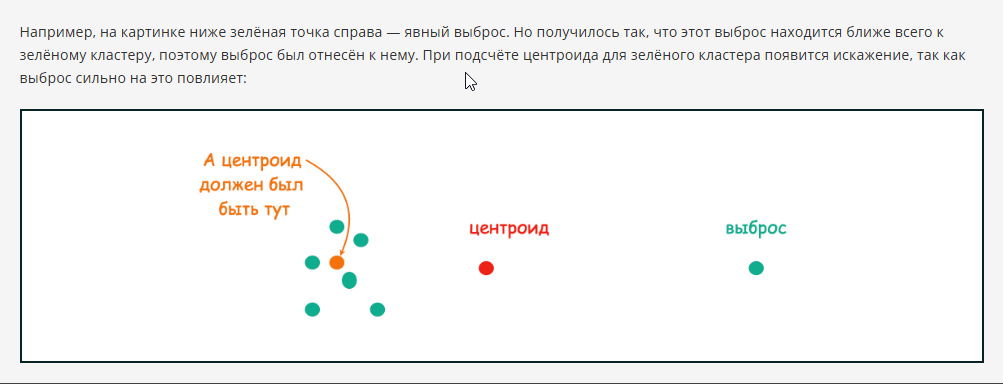

> - Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.

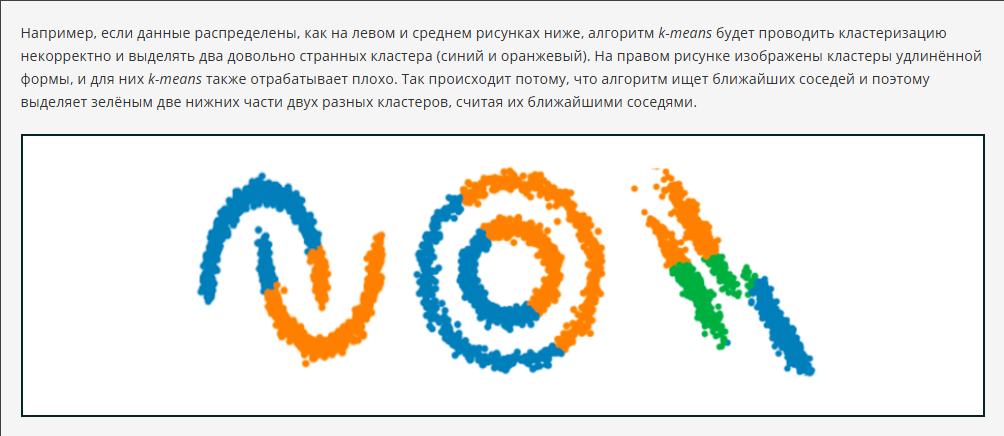

> - Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

### Задание 2.1

Что такое центроид кластера?

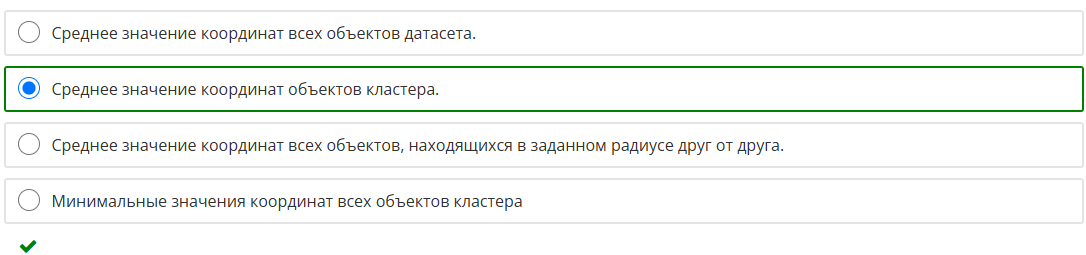

### Задание 2.2

Что пытается минимизировать алгоритм k-means?

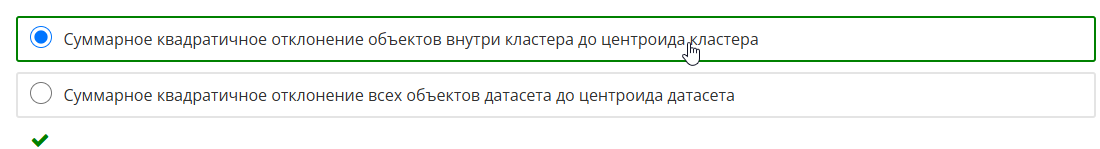

### Задание 2.3

Если в результате работы алгоритма кластеризации k-means каждый объект принадлежит отдельному кластеру, такая модель будет считаться...


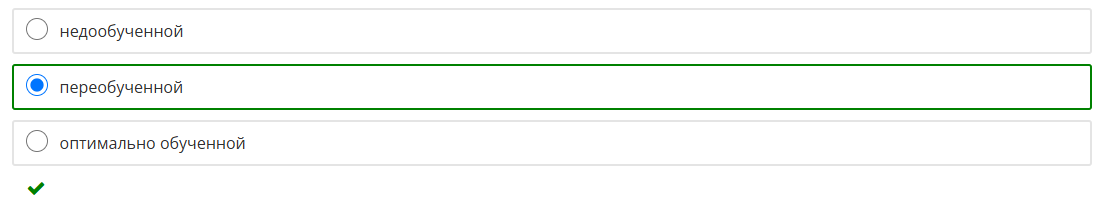

### Задание 2.4

Какие метрики и индексы можно использовать для того, чтобы найти оптимальное количество кластеров?

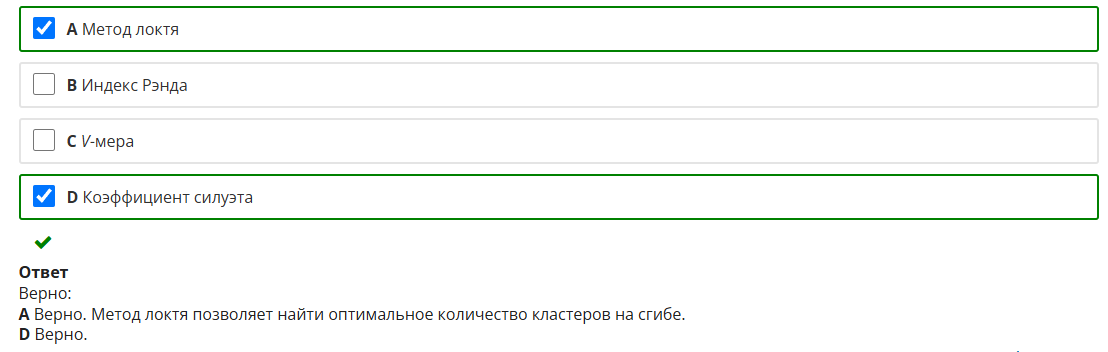

### Задание 2.5

Вы проводите кластеризацию k-means и хотите найти оптимальное количество кластеров. Для этого вы воспользовались методом локтя и нарисовали график зависимости инерции от количества кластеров:

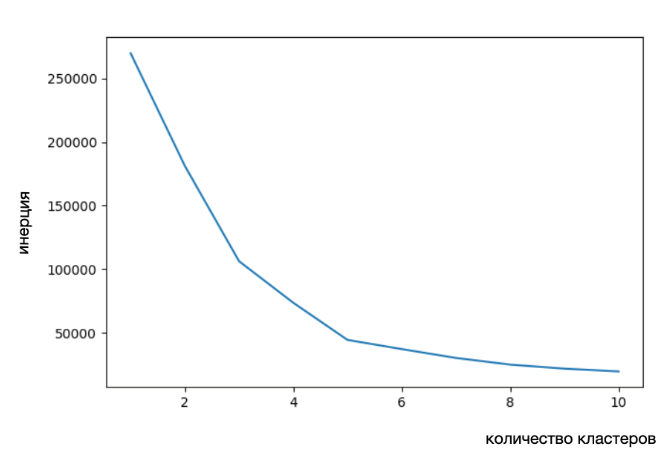

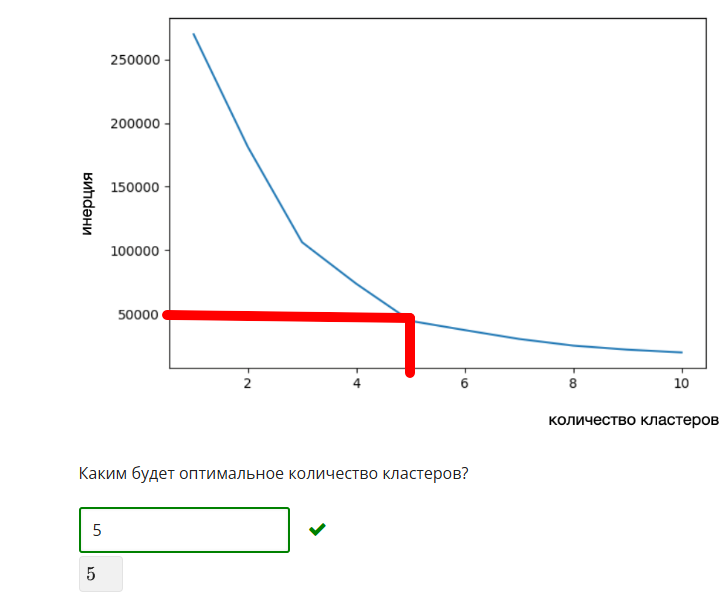

### Задание 2.6

На каких данных алгоритм k-means будет отрабатывать плохо?

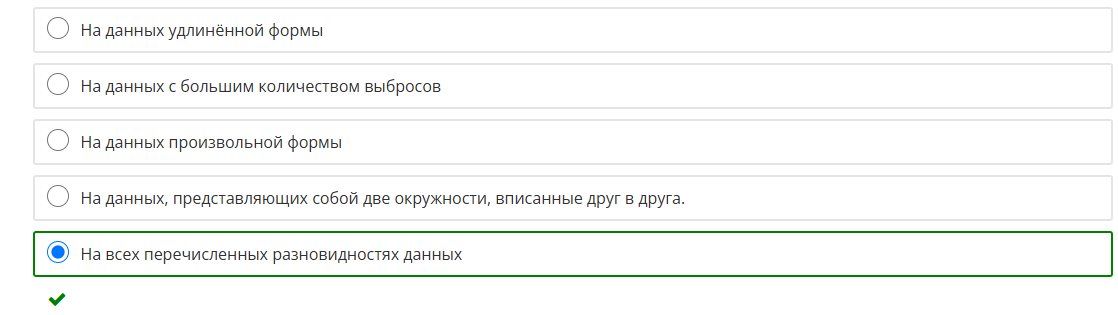

### Задание 2.7

Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

In [9]:
df = pd.read_csv('data/values_from_the_instrument.csv')

<Axes: xlabel='cluster', ylabel='silhouette'>

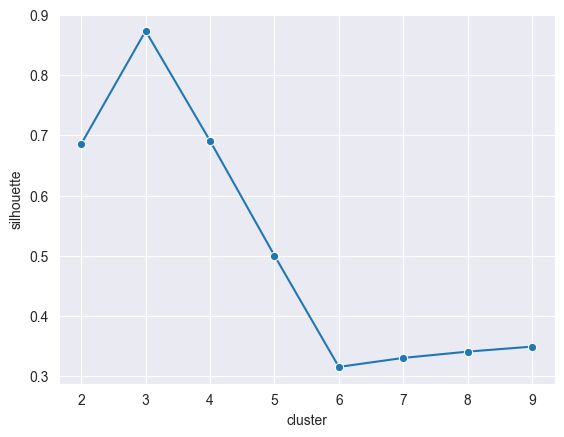

In [11]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")